# 02 Clustering

    01 Import data
    02 Using the elbow technique
    03 K-means clustering
    04 Descriptive statistics for clusters

In [38]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.cluster import KMeans # Here is where you import the k-means algorithm from scikit-learn.
import pylab as pl # PyLab is a convenience module that bulk imports matplotlib.

In [2]:
# This option ensures the graphs you create are displayed in your notebook without the need to "call" them specifically.

%matplotlib inline

In [3]:
path = r'C:\Users\Lenovo\OneDrive\Dokumente\CareerFoundry\Data Immersion\6. Advanced Analytics and Dashboard Design'

## 01 Import data

In [4]:
# Import Data
df = pd.read_csv(os.path.join(path, 'BRICS', '02 Data', 'Prepared Data', 'world_hapiness_final_with_dots.csv'))


In [5]:
df.shape

(231, 26)

In [6]:
df['country'].value_counts()

country
Brazil                21
Canada                21
China                 21
France                21
Germany               21
India                 21
Italy                 21
Russian Federation    21
South Africa          21
United Kingdom        21
United States         21
Name: count, dtype: int64

## 02 The elbow technique

    to determine the number of clusters

### Creating subset for ellbow technique

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 231 entries, 0 to 230
Data columns (total 26 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   date                    231 non-null    object 
 1   country                 231 non-null    object 
 2   continent               231 non-null    object 
 3   life_expectancy         231 non-null    float64
 4   population              231 non-null    int64  
 5   co2_emissions           231 non-null    float64
 6   health_expenditure      231 non-null    float64
 7   gdp_per_capita          231 non-null    float64
 8   internet_users          231 non-null    float64
 9   military_exp            231 non-null    float64
 10  open_defecation         231 non-null    float64
 11  drinking_water          231 non-null    float64
 12  obesity_among_adults    231 non-null    float64
 13  beer_cons_per_capita    231 non-null    float64
 14  account_balance         231 non-null    fl

In [8]:
selected_columns = ['life_expectancy', 'population', 'co2_emissions', 'health_expenditure', 'gdp_per_capita', 'internet_users', 'military_exp', 'open_defecation', 'drinking_water', 'obesity_among_adults', 'beer_cons_per_capita', 'gdp']



In [9]:


df1= df[selected_columns]

In [10]:
df1.head()

,life_expectancy,population,co2_emissions,health_expenditure,gdp_per_capita,internet_users,military_exp,open_defecation,drinking_water,obesity_among_adults,beer_cons_per_capita,gdp
0,70.116,174790339,1.794550,8.334593,9050.494048,2.870685,1.730726,8.910026,93.471528,13.5,3.34050,599.642
1,70.462,177196051,1.802410,8.549606,9255.634759,4.528495,1.951882,8.367750,93.814337,14.0,3.35201,655.454
2,70.813,179537523,1.769881,8.696857,9560.575067,9.149425,1.895771,7.845655,94.142485,14.5,3.31994,559.982
3,71.170,181809244,1.709539,8.188999,9737.277380,13.207586,1.503478,7.334106,94.463523,15.0,3.17642,509.798
4,71.531,184006479,1.785372,8.124920,10448.313340,19.073672,1.461268,6.833189,94.777359,15.5,3.21237,558.232


### ellbow technique

In [11]:
num_cl = range(1, 10) # Defines the range of potential clusters in the data.
kmeans = [KMeans(n_clusters=i) for i in num_cl] # Defines k-means clusters in the range assigned above.

In [12]:
score = [kmeans[i].fit(df1).score(df1) for i in range(len(kmeans))] # Creates a score that represents 
# a rate of variation for the given cluster option.

score

C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Lenovo\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py:110: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] Das System kann die angegebene Datei nicht finden
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\Lenovo\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 199, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "C:\Users\Lenovo\anaconda3\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^

[-4.916009487034926e+19,
 -1.753850736294552e+18,
 -6.904824961498895e+17,
 -4.0253908805977024e+17,
 -1.6652994831282518e+17,
 -1.0622204240945314e+17,
 -7.892487011482142e+16,
 -6.069044604218896e+16,
 -4.279915601520009e+16]

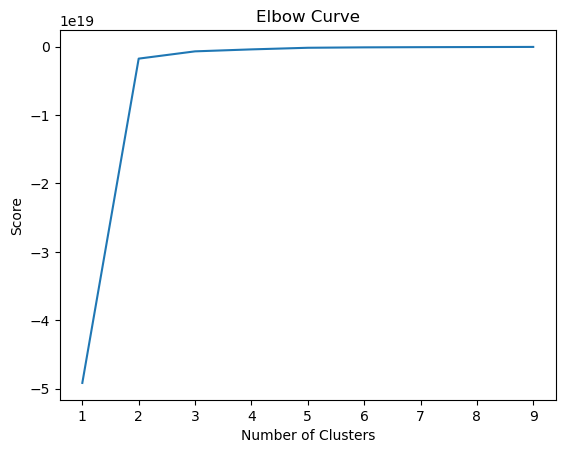

In [39]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

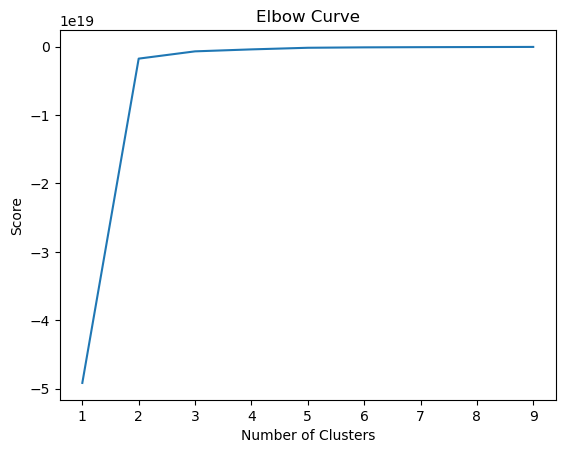

<Figure size 640x480 with 0 Axes>

#### It should be 3 clusters

## 03 k-means clustering

In [14]:
# Create the k-means object.

kmeans = KMeans(n_clusters = 3) 

In [15]:
# Fit the k-means object to the data.

kmeans.fit(df1)

C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=3)

In [16]:
df1['clusters'] = kmeans.fit_predict(df1)

C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_105300\865444660.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['clusters'] = kmeans.fit_predict(df1)


In [17]:
df1.head()

,life_expectancy,population,co2_emissions,health_expenditure,gdp_per_capita,internet_users,military_exp,open_defecation,drinking_water,obesity_among_adults,beer_cons_per_capita,gdp,clusters
0,70.116,174790339,1.794550,8.334593,9050.494048,2.870685,1.730726,8.910026,93.471528,13.5,3.34050,599.642,2
1,70.462,177196051,1.802410,8.549606,9255.634759,4.528495,1.951882,8.367750,93.814337,14.0,3.35201,655.454,2
2,70.813,179537523,1.769881,8.696857,9560.575067,9.149425,1.895771,7.845655,94.142485,14.5,3.31994,559.982,2
3,71.170,181809244,1.709539,8.188999,9737.277380,13.207586,1.503478,7.334106,94.463523,15.0,3.17642,509.798,2
4,71.531,184006479,1.785372,8.124920,10448.313340,19.073672,1.461268,6.833189,94.777359,15.5,3.21237,558.232,2


In [18]:
df1['clusters'].value_counts()

clusters
1    147
2     42
0     42
Name: count, dtype: int64

In [19]:
df1.columns

Index(['life_expectancy', 'population', 'co2_emissions', 'health_expenditure',
       'gdp_per_capita', 'internet_users', 'military_exp', 'open_defecation',
       'drinking_water', 'obesity_among_adults', 'beer_cons_per_capita', 'gdp',
       'clusters'],
      dtype='object')

### Plot cluster with gdp_per_capita

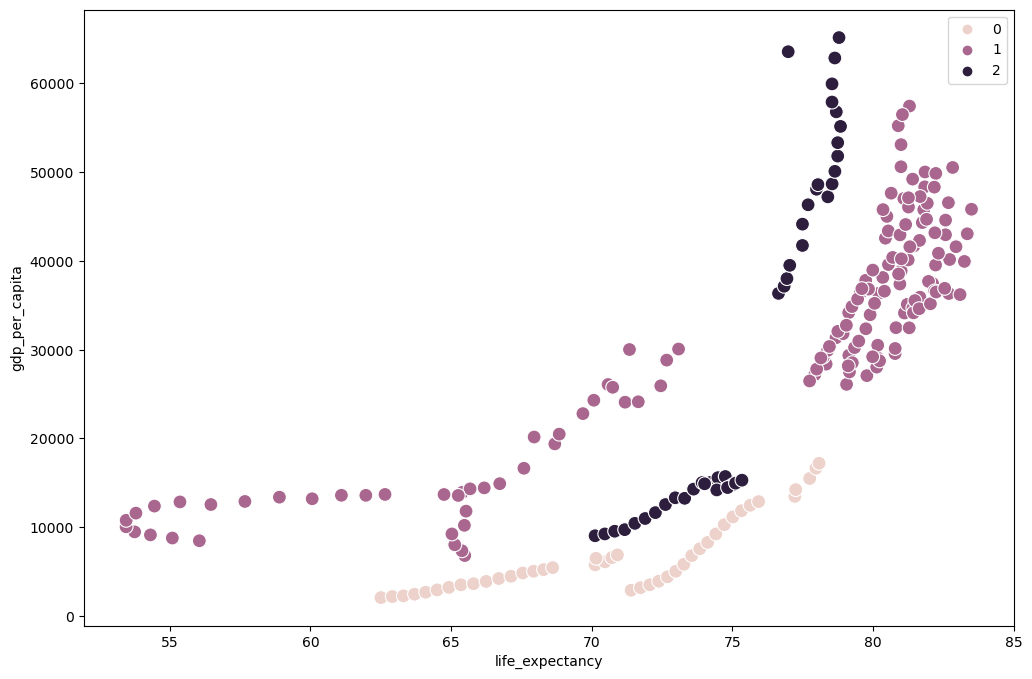

In [20]:
# Plot the clusters for the "life_expectancy" and "gdp_per_capita" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['life_expectancy'], y=df['gdp_per_capita'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('life_expectancy') # Label x-axis.
plt.ylabel('gdp_per_capita') # Label y-axis.
plt.show()

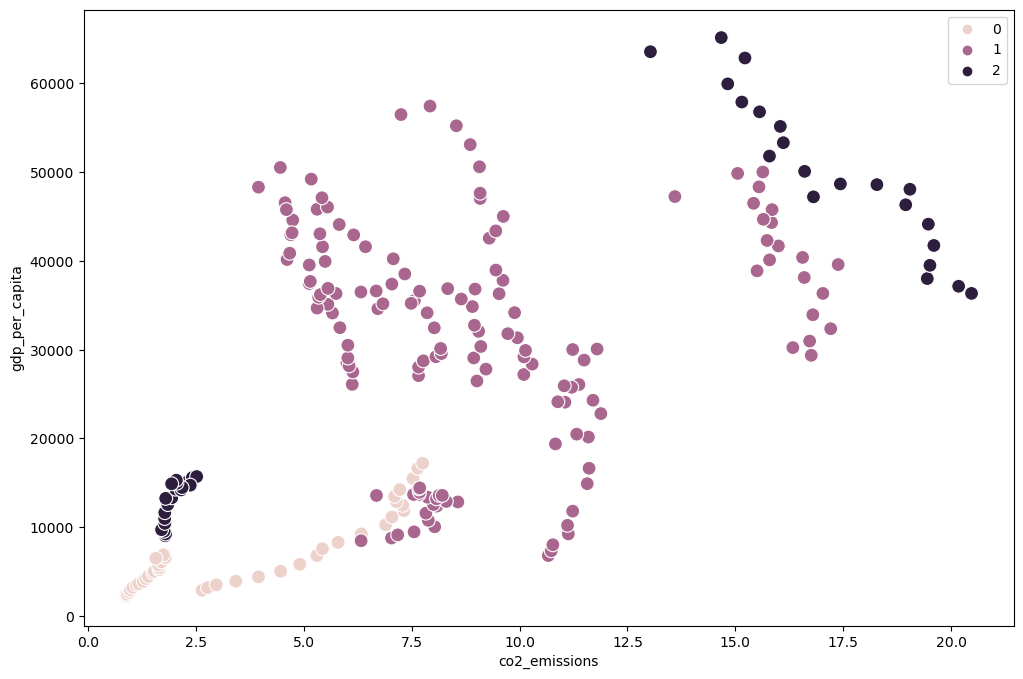

In [21]:
# Plot the clusters for the "co2_emissions" and "gdp_per_capita" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['co2_emissions'], y=df['gdp_per_capita'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('co2_emissions') # Label x-axis.
plt.ylabel('gdp_per_capita') # Label y-axis.
plt.show()

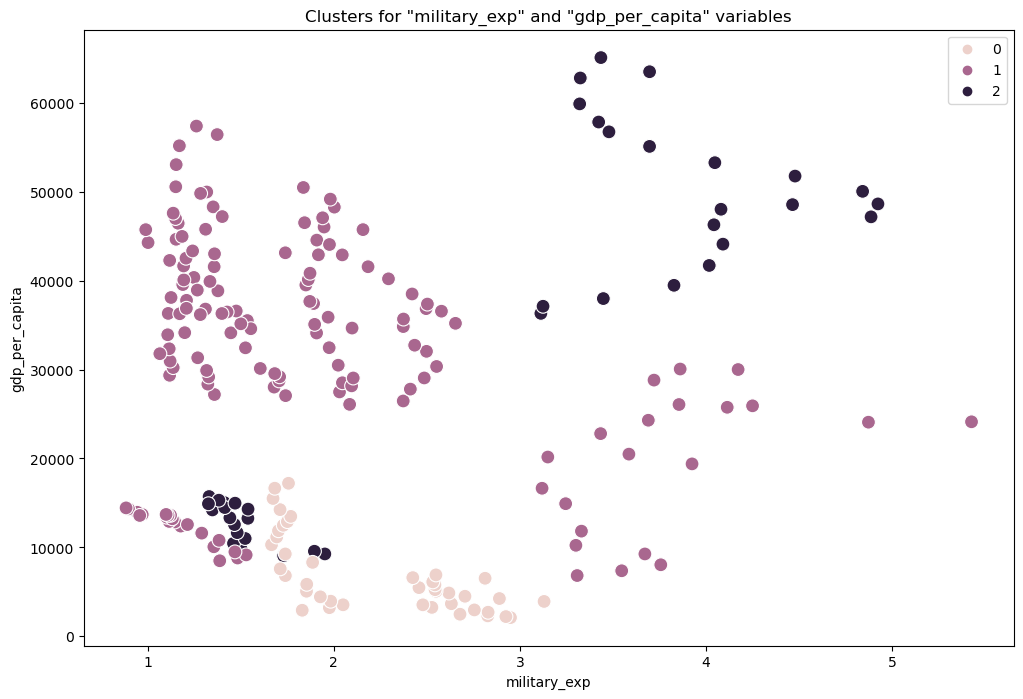

In [46]:
plt.figure(figsize=(12, 8))
ax = sns.scatterplot(x=df['military_exp'], y=df['gdp_per_capita'], hue=kmeans.labels_, s=100)
ax.grid(False)
plt.xlabel('military_exp')
plt.ylabel('gdp_per_capita')
plt.title('Clusters for "military_exp" and "gdp_per_capita" variables')

# Speichern Sie die Abbildung ab
file_path = r'C:\Users\Lenovo\OneDrive\Dokumente\CareerFoundry\Data Immersion\6. Advanced Analytics and Dashboard Design\BRICS\04 Analysis\Visualizations'
plt.savefig(file_path + '\\Cluster_Plot.png')

# Anzeigen der Abbildung (optional)
plt.show()

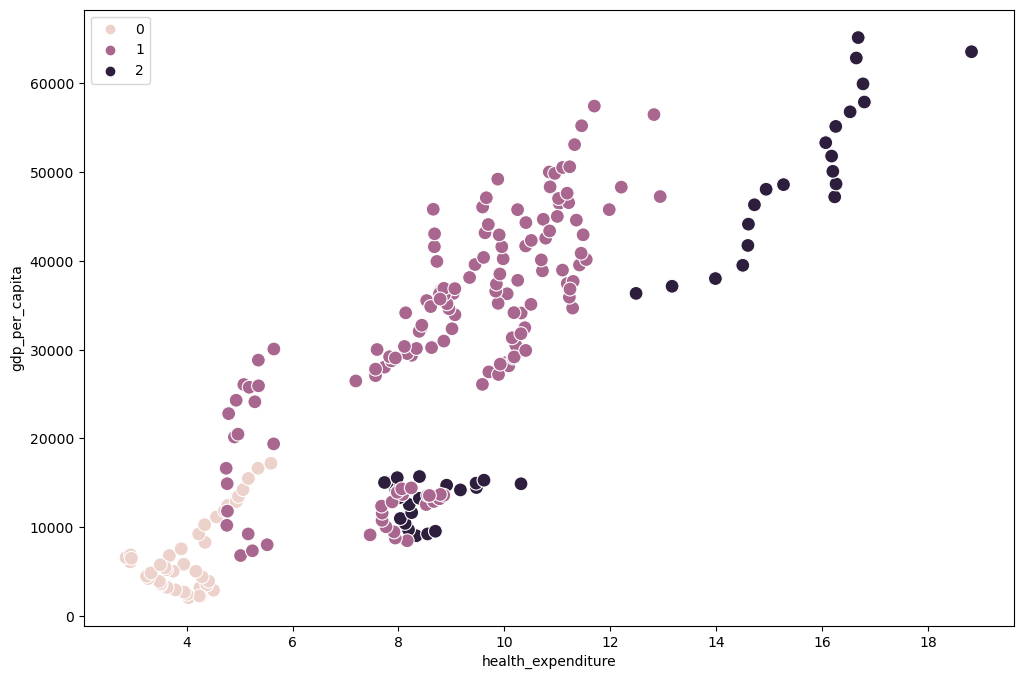

In [23]:
# Plot the clusters for the "health_gdp" and "gdp_per_capita" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['health_expenditure'], y=df['gdp_per_capita'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('health_expenditure') # Label x-axis.
plt.ylabel('gdp_per_capita') # Label y-axis.
plt.show()

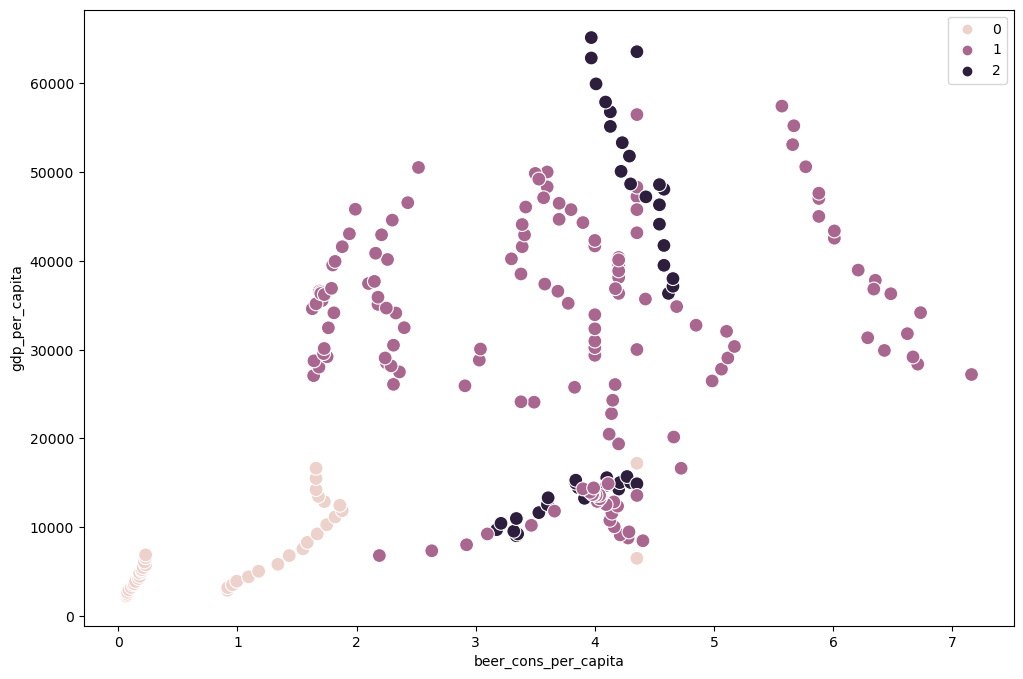

In [24]:
# Plot the clusters for the "beer_cons_per_capita" and "gdp_per_capita" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['beer_cons_per_capita'], y=df['gdp_per_capita'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('beer_cons_per_capita') # Label x-axis.
plt.ylabel('gdp_per_capita') # Label y-axis.
plt.show()

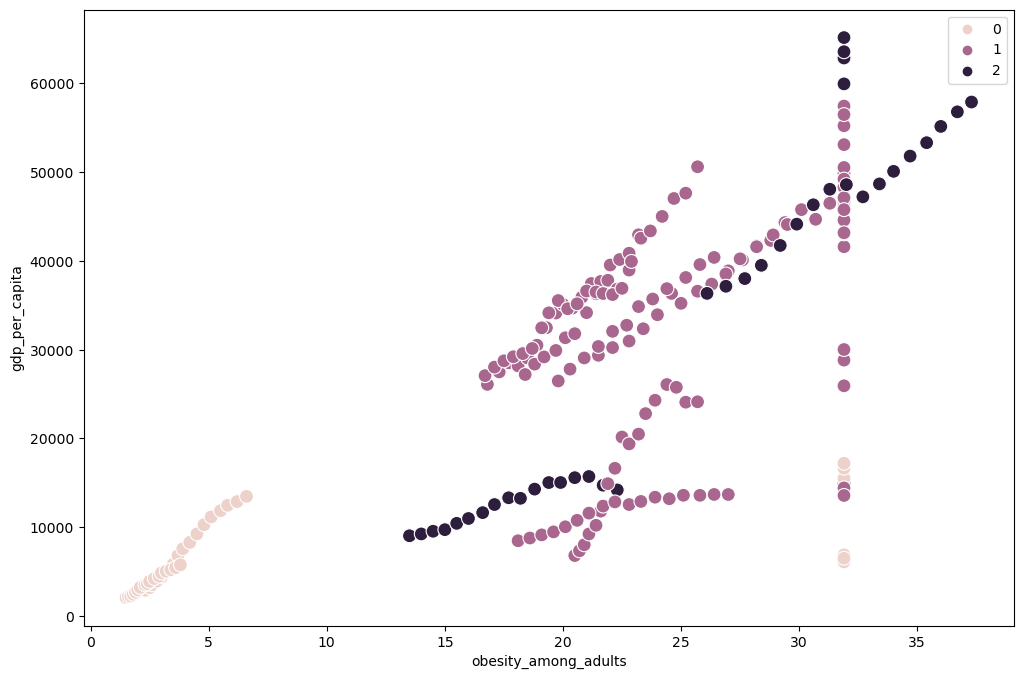

In [25]:
# Plot the clusters for the "obesity_among_adults" and "gdp_per_capita" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['obesity_among_adults'], y=df['gdp_per_capita'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('obesity_among_adults') # Label x-axis.
plt.ylabel('gdp_per_capita') # Label y-axis.
plt.show()

### other variables

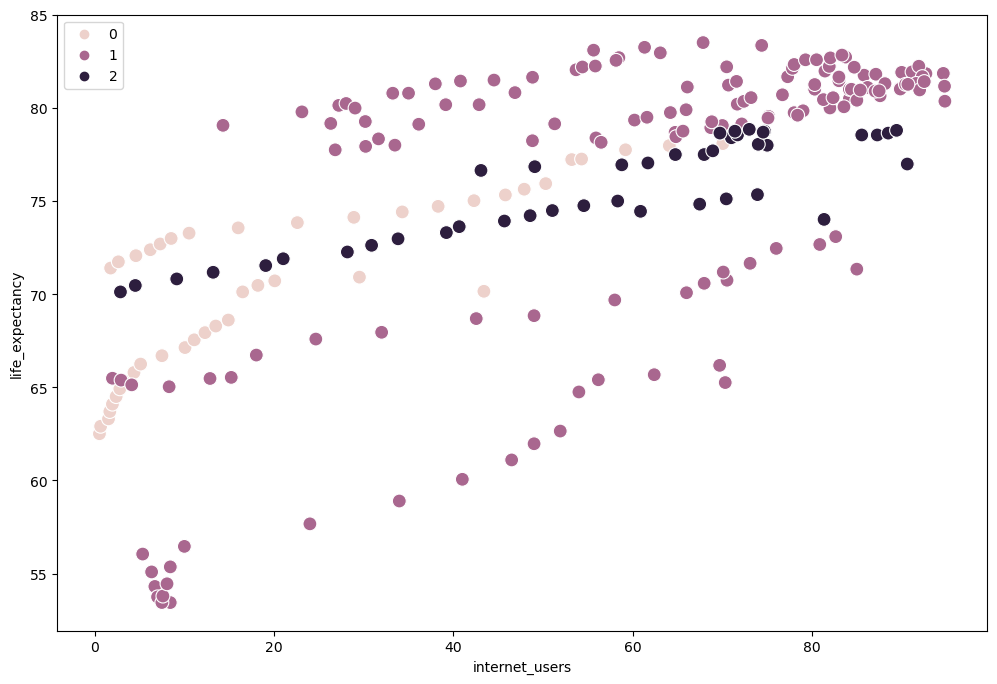

In [26]:
# Plot the clusters for the "internet_users" and "life_expectancy" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['internet_users'], y=df['life_expectancy'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('internet_users') # Label x-axis.
plt.ylabel('life_expectancy') # Label y-axis.
plt.show()

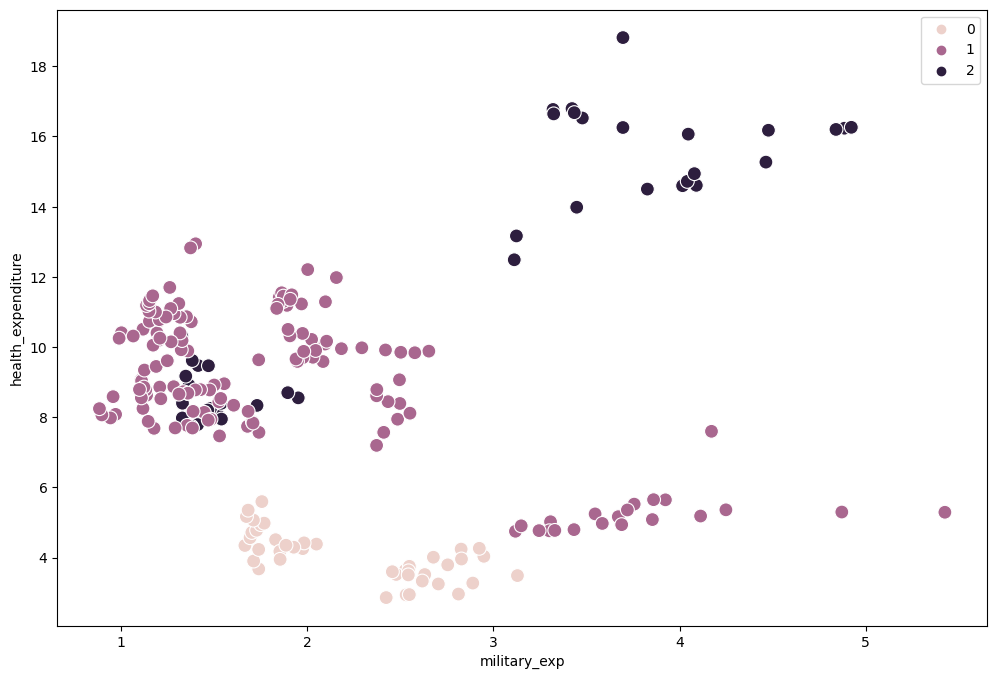

In [27]:
# Plot the clusters for the "military_exp" and "health_expenditure" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['military_exp'], y=df['health_expenditure'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('military_exp') # Label x-axis.
plt.ylabel('health_expenditure') # Label y-axis.
plt.show()

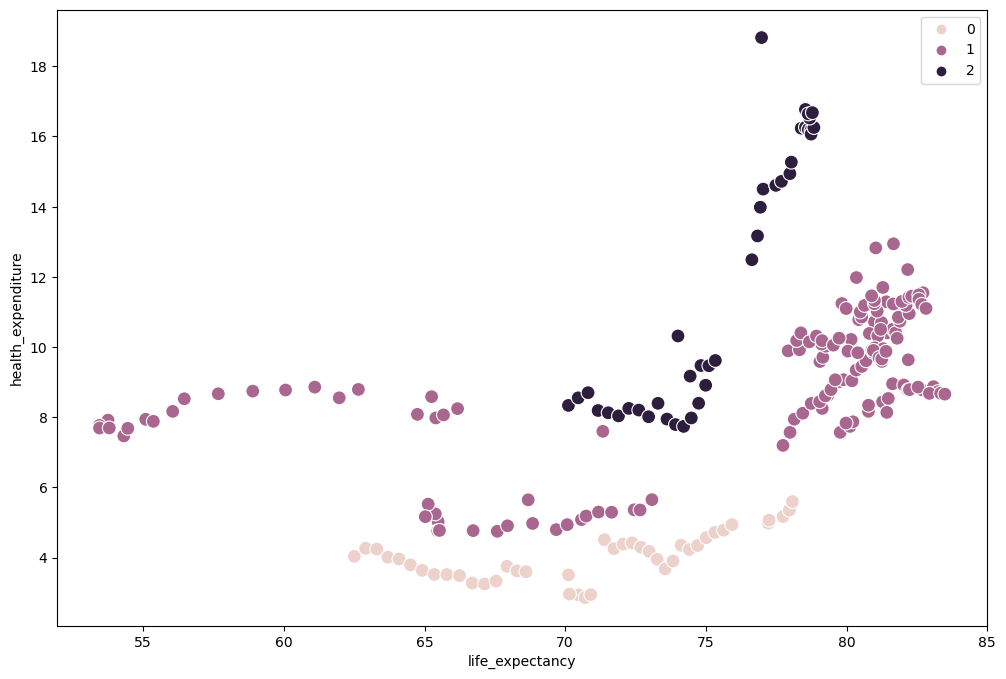

In [28]:
# Plot the clusters for the "life_expectancy" and "health_expenditure" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['life_expectancy'], y=df['health_expenditure'], hue=kmeans.labels_, s=100)

ax.grid(False) 
plt.xlabel('life_expectancy') 
plt.ylabel('health_expenditure') 
plt.show()

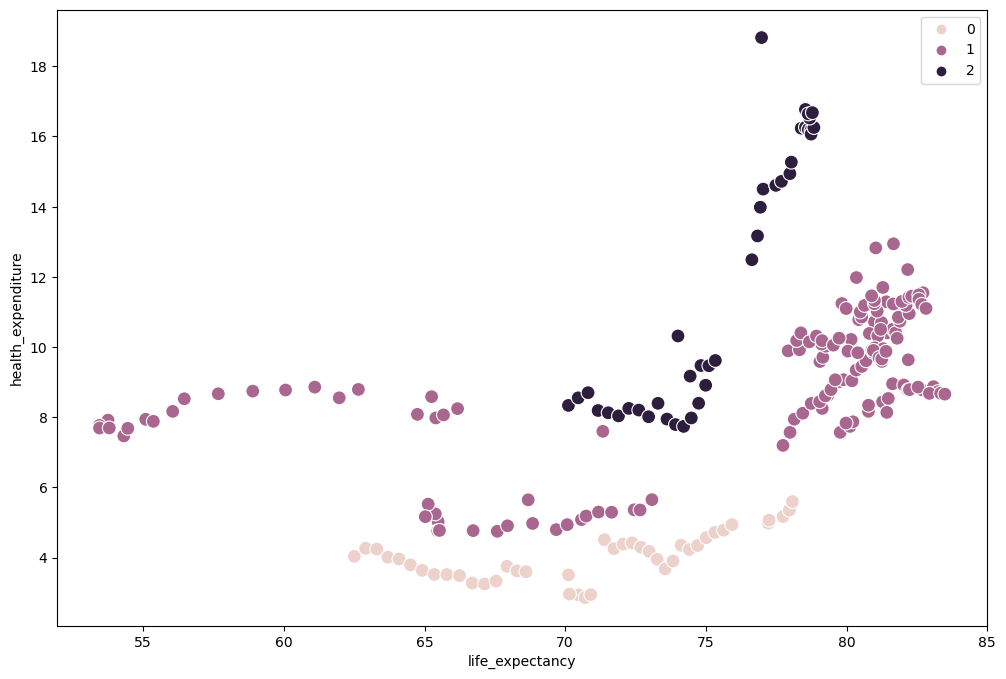

In [29]:
# Plot the clusters for the "life_expectancy" and "health_gdp" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['life_expectancy'], y=df['health_expenditure'], hue=kmeans.labels_, s=100)

ax.grid(False) 
plt.xlabel('life_expectancy') 
plt.ylabel('health_expenditure') 
plt.show()

## 04 Descriptive statistics for clusters

In [30]:
df1.columns

Index(['life_expectancy', 'population', 'co2_emissions', 'health_expenditure',
       'gdp_per_capita', 'internet_users', 'military_exp', 'open_defecation',
       'drinking_water', 'obesity_among_adults', 'beer_cons_per_capita', 'gdp',
       'clusters'],
      dtype='object')

In [31]:
df1.loc[df1['clusters'] == 2, 'cluster'] = 'dark purple'
df1.loc[df1['clusters'] == 1, 'cluster'] = 'purple'
df1.loc[df1['clusters'] == 0, 'cluster'] = 'pink'

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_105300\2078207149.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.loc[df1['clusters'] == 2, 'cluster'] = 'dark purple'


In [32]:
df1.groupby('cluster').agg({'life_expectancy':['mean', 'median'], 
                         'health_expenditure':['mean', 'median'], 
                         'gdp_per_capita':['mean', 'median'],
                          'obesity_among_adults':['mean', 'median'],
                           'population':['mean', 'median'], 
                         'co2_emissions':['mean', 'median'], 
                          'internet_users':['mean', 'median'], 
                         'military_exp':['mean', 'median'], 
                         'open_defecation':['mean', 'median'],
                          'drinking_water':['mean', 'median'],
                           'obesity_among_adults':['mean', 'median'], 
                         'beer_cons_per_capita':['mean', 'median'], 
                         'gdp':['mean', 'median']})

life_expectancy            health_expenditure             \
                       mean     median               mean     median   
cluster                                                                
dark purple       75.596137  75.987293          12.076851  11.398618   
pink              70.694000  71.153500           4.049819   4.021706   
purple            75.932260  80.051220           8.990194   9.010901   

            gdp_per_capita              obesity_among_adults         \
                      mean       median                 mean median   
cluster                                                               
dark purple   31571.533030  26024.26051            26.173810  28.80   
pink           6832.728021   5349.37076             8.757143   3.45   
purple        31810.261985  34121.34388            24.323129  23.20   

               population                ... military_exp            \
                     mean        median  ...         mean    median   
cluster                                  ...                          
dark purple  2.516069e+08  2.476794e+08  ...     2.691367  2.532062   
pink         1.285820e+09  1.306936e+09  ...     2.238993  2.236985   
purple       7.118490e+07  6.180527e+07  ...     1.878331  1.525483   

            open_defecation           drinking_water             \
                       mean    median           mean     median   
cluster                                                           
dark purple        2.108647  0.152064      97.767194  98.642500   
pink              22.843251  9.466643      87.149197  86.868290   
purple             0.830953  0.000000      97.784402  99.814184   

            beer_cons_per_capita                   gdp             
                            mean   median         mean     median  
cluster                                                            
dark purple             4.067254  4.13000  8266.942167  6122.6010  
pink                    0.977680  0.91803  3874.405714  1994.2865  
purple                  3.740153  3.99000  1837.015429  1844.0830  

[3 rows x 24 columns]